<a href="https://colab.research.google.com/github/rihabidm/Linear-regression-on-the-Boston-Housing-dataset/blob/master/lab_1_r%C3%A9gression_lin%C3%A9aire__Rihab_Id_m'hand_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

## Importing the csv file containing the data

In [ ]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\school\Advanced Machine Learning\housing.csv')

## Exploring the housing data

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Exploring the percentage of outliers for each variable

In [ ]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column RM outliers = 4.50%
Column LSTAT outliers = 1.43%
Column PTRATIO outliers = 2.66%
Column MEDV outliers = 4.50%


# Data processing

## A scatter plot between the variables MEDV and RM

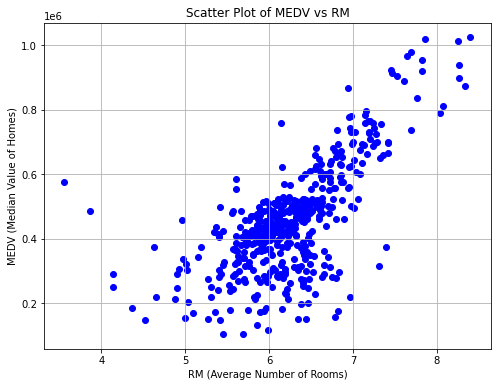

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'], color='blue')
plt.title('Scatter Plot of MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

The variables we'll use to predict MEDV are RM and then LSTAT, which are the most correlated variables wit MEDV.

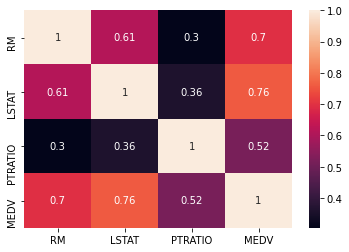

In [ ]:
plt.figure()
sns.heatmap(df.corr().abs(), annot = True)

## Splitting the data for training

In [ ]:
train_test_split(df)

[        RM  LSTAT  PTRATIO      MEDV
 329  5.968   9.29     20.2  392700.0
 103  6.137  13.44     20.9  405300.0
 435  6.297  17.27     20.2  338100.0
 271  6.968   4.59     14.9  743400.0
 20   5.570  21.02     21.0  285600.0
 ..     ...    ...      ...       ...
 148  5.186  28.32     14.7  373800.0
 202  5.344  23.09     18.6  420000.0
 186  6.739   4.69     15.2  640500.0
 331  6.540   8.65     15.9  346500.0
 403  6.411  15.02     20.2  350700.0
 
 [366 rows x 4 columns],
         RM  LSTAT  PTRATIO       MEDV
 383  5.987  26.77     20.2   117600.0
 154  6.129  15.12     14.7   357000.0
 386  5.349  19.77     20.2   174300.0
 352  5.803  14.64     20.2   352800.0
 75   6.286   8.94     18.7   449400.0
 ..     ...    ...      ...        ...
 94   6.249  10.59     18.2   432600.0
 225  8.247   3.95     17.4  1014300.0
 293  7.236   6.93     18.4   758100.0
 378  6.471  17.12     20.2   275100.0
 325  5.869   9.80     20.2   409500.0
 
 [123 rows x 4 columns]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['RM']), np.array(df['MEDV']), test_size=0.2, random_state=365)

In [ ]:
x_train.shape, x_test.shape

((391,), (98,))

In [ ]:
y_train.shape, y_test.shape

((391,), (98,))

In [ ]:
x_train

array([6.43 , 6.121, 5.709, 5.57 , 7.412, 5.602, 6.164, 5.617, 6.812,
       4.926, 6.727, 6.75 , 6.701, 6.842, 5.952, 6.389, 5.949, 6.254,
       6.086, 6.794, 6.606, 5.869, 5.572, 5.983, 6.411, 5.924, 5.67 ,
       6.98 , 6.657, 6.358, 5.887, 6.833, 6.546, 6.167, 6.426, 6.897,
       5.093, 6.398, 6.437, 6.471, 6.728, 5.412, 5.569, 5.92 , 5.852,
       7.416, 5.707, 6.021, 6.273, 6.54 , 6.115, 5.88 , 5.427, 7.007,
       6.376, 6.434, 5.019, 6.538, 6.172, 6.718, 6.749, 6.728, 6.266,
       6.185, 5.648, 6.629, 5.637, 6.631, 5.856, 5.39 , 5.762, 6.739,
       5.731, 6.38 , 6.461, 6.417, 6.976, 6.015, 5.787, 6.163, 6.849,
       6.758, 6.031, 6.382, 8.337, 6.009, 6.113, 6.975, 6.59 , 5.349,
       6.23 , 6.484, 5.663, 6.041, 6.348, 5.963, 6.037, 4.138, 5.898,
       7.241, 6.003, 5.599, 6.006, 7.645, 6.86 , 5.936, 5.987, 5.914,
       5.713, 5.926, 5.942, 7.014, 5.972, 5.631, 7.454, 6.474, 4.963,
       6.595, 6.968, 6.02 , 5.95 , 5.961, 6.63 , 6.312, 6.229, 5.885,
       6.38 , 6.727,

In [ ]:
x_test

array([5.888, 5.822, 6.481, 5.841, 5.926, 5.961, 6.575, 6.144, 6.49 ,
       6.63 , 6.242, 5.39 , 5.871, 7.249, 5.905, 5.878, 5.155, 6.301,
       6.393, 6.202, 8.259, 5.344, 5.986, 6.456, 6.114, 5.608, 6.495,
       5.99 , 7.185, 5.272, 5.404, 5.965, 6.169, 6.229, 7.61 , 6.297,
       5.404, 7.163, 4.138, 6.8  , 6.782, 6.251, 5.757, 6.064, 6.193,
       8.069, 6.286, 5.813, 6.415, 7.393, 6.137, 5.012, 6.162, 8.247,
       7.203, 5.304, 6.152, 5.803, 6.405, 6.431, 6.081, 6.012, 5.936,
       5.913, 5.874, 5.56 , 5.927, 7.313, 6.249, 6.604, 6.635, 5.966,
       5.957, 6.635, 7.107, 6.333, 5.186, 5.87 , 5.52 , 6.009, 6.316,
       6.211, 6.939, 6.096, 6.861, 5.889, 5.605, 6.176, 5.468, 6.417,
       4.519, 5.998, 5.851, 6.209, 6.279, 5.531, 7.135, 5.96 ])

In [ ]:
y_train

array([ 602700.,  466200.,  407400.,  285600.,  665700.,  407400.,
        455700.,  361200.,  737100.,  306600.,  588000.,  497700.,
        344400.,  632100.,  399000.,  501900.,  428400.,  388500.,
        504000.,  462000.,  489300.,  409500.,  485100.,  285600.,
        350700.,  327600.,  485100.,  781200.,  361200.,  466200.,
        266700.,  296100.,  617400.,  422100.,  499800.,  462000.,
        170100.,  525000.,  487200.,  275100.,  632100.,  497700.,
        367500.,  434700.,  132300.,  697200.,  457800.,  403200.,
        506100.,  346500.,  430500.,  401100.,  289800.,  495600.,
        371700.,  151200.,  302400.,  512400.,  569100.,  550200.,
        281400.,  312900.,  453600.,  296100.,  436800.,  281400.,
        300300.,  527100.,  443100.,  241500.,  457800.,  640500.,
        405300.,  275100.,  201600.,  474600.,  501900.,  472500.,
        407400.,  449400.,  592200.,  680400.,  407400.,  485100.,
        875700.,  455700.,  441000.,  732900.,  462000.,  1743

In [ ]:
y_test

array([ 489300.,  386400.,  497700.,  420000.,  514500.,  455700.,
        504000.,  760200.,  480900.,  585900.,  483000.,  413700.,
        432600.,  743400.,  432600.,  462000.,  342300.,  312900.,
        497700.,  228900.,  898800.,  420000.,  449400.,  466200.,
        401100.,  585900.,  554400.,  367500.,  732900.,  275100.,
        405300.,  411600.,  531300.,  411600.,  888300.,  338100.,
        411600.,  663600.,  289800.,  653100.,  157500.,  417900.,
        327600.,  512400.,  289800.,  812700.,  449400.,  348600.,
        525000.,  373800.,  405300.,  321300.,  506100., 1014300.,
        709800.,  218400.,  327600.,  352800.,  262500.,  378000.,
        420000.,  480900.,  432600.,  394800.,  426300.,  478800.,
        411600.,  315000.,  432600.,  611100.,  478800.,  518700.,
        184800.,  514500.,  636300.,  474600.,  373800.,  462000.,
        258300.,  396900.,  466200.,  518700.,  558600.,  382200.,
        598500.,  455700.,  388500.,  445200.,  327600.,  2730

In [ ]:
Creating a simple linear regression model using the imported library

In [ ]:
model = LinearRegression()

In [ ]:
Training the model

In [ ]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
model.fit(x_train, y_train)

LinearRegression()

# Making predictions on the testing set using RM

In [ ]:
y_pred = model.predict(x_test.reshape(-1, 1))

## Visualizing the performance indicators for the model for the variable RM

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 12895128896.791357


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 113556.72105512451


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.45697500126872803


The R-squared score is relatively low for this model

In [ ]:
# Printing the intercept and coefficients (slope)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-708766.87030782]
Coefficients: [[185909.80376607]]


## Creating a line plot to visualize the relationship between the dependent variable (MEDV) and the independent variable (RM) along with the predicted values from the model.

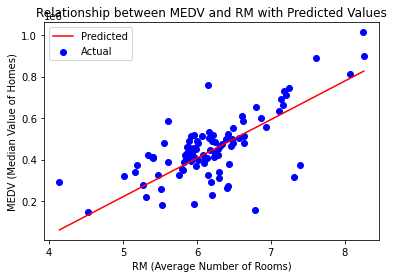

In [ ]:
X_test_sorted = np.sort(x_test.reshape(-1, 1), axis=0)
y_pred_sorted = model.predict(X_test_sorted)

# Plotting the actual values
plt.scatter(x_test, y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')

# Adding labels and title
plt.title('Relationship between MEDV and RM with Predicted Values')
plt.xlabel('RM (Average Number of Rooms)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.legend()

# Display the plot
plt.show()

# Making predictions on the testing set using LSTAT


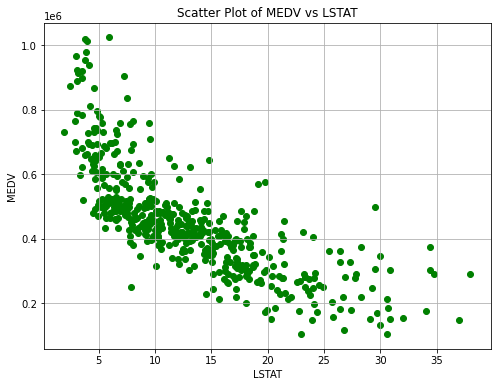

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'], color='green')
plt.title('Scatter Plot of MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['LSTAT']), np.array(df['MEDV']), test_size=0.2, random_state=365)

In [ ]:
x_train

array([ 5.21,  8.44, 15.79, 21.02,  5.25, 16.2 , 21.46, 26.4 ,  4.85,
       29.53,  5.29,  7.74, 16.42,  6.9 , 17.15,  9.62,  8.26, 10.45,
       10.88,  6.48,  7.37,  9.8 , 14.69, 18.07, 15.02, 16.3 , 17.6 ,
        5.04, 21.22, 11.22, 16.35, 19.69,  5.33, 12.33,  7.2 , 11.38,
       29.68,  7.79, 14.36, 17.12,  4.5 , 29.55, 15.1 , 13.65, 29.97,
        6.19, 12.01, 10.3 ,  6.78,  8.65,  9.43, 12.03, 18.14,  5.5 ,
       14.65, 29.05, 34.41,  7.73, 19.15,  6.56, 17.44, 18.71,  7.9 ,
       18.13, 14.1 , 23.27, 18.34,  9.54, 13.  , 20.85, 10.42,  4.69,
       13.61, 23.69, 18.05,  8.81,  5.64, 12.86, 10.24, 11.34,  7.53,
        3.53,  7.83, 10.36,  2.47, 10.4 , 12.73,  4.56,  9.5 , 19.77,
       12.93, 18.68,  8.05,  7.7 , 17.64, 13.45,  8.01, 23.34, 12.67,
        5.49, 21.32, 16.51, 15.7 ,  3.01,  6.92, 16.94, 26.77, 18.33,
       14.76, 18.13, 16.9 , 14.79,  9.97, 29.93,  3.11, 12.27, 14.  ,
        4.32, 17.21, 10.11, 27.71, 17.93,  6.53, 10.58, 15.55,  8.79,
       24.08,  9.42,

In [ ]:
x_test

array([13.51, 15.03,  6.36, 11.41, 13.59,  9.88,  4.98,  9.45,  5.98,
        4.7 , 10.74, 21.14, 13.34,  4.81, 11.45,  8.1 , 20.08, 16.23,
        5.19, 14.52,  3.54, 23.09, 14.81,  6.73, 14.98, 12.13,  8.67,
       14.67,  5.39, 16.14, 23.98, 13.83,  5.81, 12.87,  3.11, 17.27,
       13.28,  6.36, 37.97,  5.03, 25.79, 14.19, 17.31, 14.66, 15.17,
        4.21,  8.94, 14.81,  6.12, 16.74, 13.44, 12.12,  7.43,  3.95,
        9.59, 26.64, 15.02, 14.64, 19.37, 15.39, 14.7 , 12.43,  5.57,
       16.21,  9.1 , 10.45,  9.22, 13.44, 10.59,  4.38,  4.54, 10.13,
       20.62,  5.99,  8.61,  7.34, 28.32, 14.37, 24.56, 13.27,  5.68,
        7.44,  5.89, 10.26,  3.33, 15.71, 18.46, 12.04, 26.42, 19.31,
       36.98,  8.43, 16.47,  7.14, 11.97, 27.38,  4.45, 17.27])

In [ ]:
y_train

array([ 602700.,  466200.,  407400.,  285600.,  665700.,  407400.,
        455700.,  361200.,  737100.,  306600.,  588000.,  497700.,
        344400.,  632100.,  399000.,  501900.,  428400.,  388500.,
        504000.,  462000.,  489300.,  409500.,  485100.,  285600.,
        350700.,  327600.,  485100.,  781200.,  361200.,  466200.,
        266700.,  296100.,  617400.,  422100.,  499800.,  462000.,
        170100.,  525000.,  487200.,  275100.,  632100.,  497700.,
        367500.,  434700.,  132300.,  697200.,  457800.,  403200.,
        506100.,  346500.,  430500.,  401100.,  289800.,  495600.,
        371700.,  151200.,  302400.,  512400.,  569100.,  550200.,
        281400.,  312900.,  453600.,  296100.,  436800.,  281400.,
        300300.,  527100.,  443100.,  241500.,  457800.,  640500.,
        405300.,  275100.,  201600.,  474600.,  501900.,  472500.,
        407400.,  449400.,  592200.,  680400.,  407400.,  485100.,
        875700.,  455700.,  441000.,  732900.,  462000.,  1743

In [ ]:
y_test

array([ 489300.,  386400.,  497700.,  420000.,  514500.,  455700.,
        504000.,  760200.,  480900.,  585900.,  483000.,  413700.,
        432600.,  743400.,  432600.,  462000.,  342300.,  312900.,
        497700.,  228900.,  898800.,  420000.,  449400.,  466200.,
        401100.,  585900.,  554400.,  367500.,  732900.,  275100.,
        405300.,  411600.,  531300.,  411600.,  888300.,  338100.,
        411600.,  663600.,  289800.,  653100.,  157500.,  417900.,
        327600.,  512400.,  289800.,  812700.,  449400.,  348600.,
        525000.,  373800.,  405300.,  321300.,  506100., 1014300.,
        709800.,  218400.,  327600.,  352800.,  262500.,  378000.,
        420000.,  480900.,  432600.,  394800.,  426300.,  478800.,
        411600.,  315000.,  432600.,  611100.,  478800.,  518700.,
        184800.,  514500.,  636300.,  474600.,  373800.,  462000.,
        258300.,  396900.,  466200.,  518700.,  558600.,  382200.,
        598500.,  455700.,  388500.,  445200.,  327600.,  2730

In [ ]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(x_test.reshape(-1, 1))

## Performance indicators

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 11576317866.474096


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 107593.29842733746


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.5125112711111345


The R-squared score is higher for this model using LSTAT

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [690301.27556009]
Coefficients: [[-18220.97098828]]


## Creating a line plot to visualize the relationship between the dependent variable (MEDV) and the independent variable (LSTAT) along with the predicted values from the model.

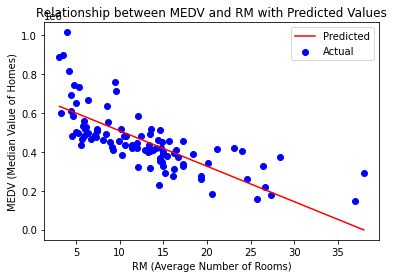

In [ ]:
X_test_sorted = np.sort(x_test.reshape(-1, 1), axis=0)
y_pred_sorted = model.predict(X_test_sorted)

# Plotting the actual values
plt.scatter(x_test, y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')

# Adding labels and title
plt.title('Relationship between MEDV and RM with Predicted Values')
plt.xlabel('RM (Average Number of Rooms)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.legend()

# Display the plot
plt.show()

# Assignment questions

## What is the relationship between the independent variable RM and the dependent variable MEDV in the Boston Housing dataset?

---
It's a correlation relationship with a value of 0.7 which is a signifocant value.


## How does the R-squared value of the model change when you use different independent variables?

---
It got higher after switching from the variable RM to the variable LSTAT


## What are the pros and cons of using a simple linear regression model?

---


**Pros:**
1. Interpretability: Easy interpretation of the relationship between variables.
2. Efficiency: Computationally efficient with only two parameters to estimate.
3. Visualization: Simple visualization of the relationship using scatter plots.
4. Initial Analysis: Useful for initial exploration and identifying potential predictors.

**Cons:**
1. Linearity Assumption: Assumes a linear relationship, which may not hold.
2. Limited Flexibility: Unable to capture complex or nonlinear relationships.
3. Outlier Sensitivity: Sensitive to outliers, affecting accuracy.
4. Omitted Variable Bias: Ignores other factors that may influence the dependent variable.